In [2]:
import numpy as np
import pandas as pd
df = pd.DataFrame([[8,8,4],[7,9,5],[6,10,6],[5,12,7]], columns=['cgpa', 'profile_score', 'lpa'])
df

,cgpa,profile_score,lpa
0,8,8,4
1,7,9,5
2,6,10,6
3,5,12,7


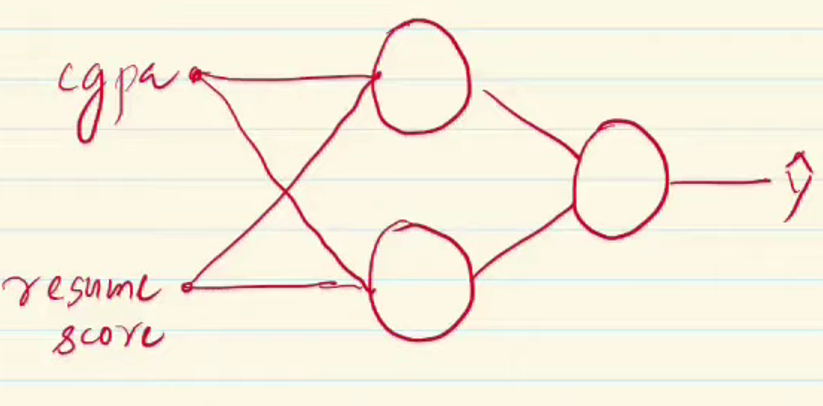

Neural Network Architecture used ⬆️⬆️

In [3]:
def initialize_parameters(layer_dims): #input your architecture in layer dims
  np.random.seed(3)
  parameters = {}
  L = len(layer_dims)
  for l in range(1, L):
    parameters['W' + str(l)] = np.ones((layer_dims[l-1], layer_dims[l]))*0.1
    parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
  return parameters

In [4]:
def linear_forward(A_prev, W, b):
  Z = np.dot(W.T, A_prev) + b
  return Z

In [5]:
# Forward Prop
def L_layer_forward(X, parameters):
  A = X
  L = len(parameters) // 2  # number of layers in the neural network
  for l in range(1, L+1):
    A_prev = A
    Wl = parameters['W' + str(l)]
    bl = parameters['b' + str(l)]
    #print("A"+str(l-1)+": ", A_prev)
    #print("W"+str(l)+": ", Wl)
    #print("b"+str(l)+": ", bl)
    #print("--"*20)
    A = linear_forward(A_prev, Wl, bl)
    #print("A"+str(l)+": ", A)
    #print("**"*20)
  return A,A_prev

In [6]:
def update_parameters(parameters,y,y_hat,A1,X):
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.001 * 2 * (y - y_hat)*A1[0][0])
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat)*A1[1][0])
  parameters['b2'][0][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat))

  parameters['W1'][0][0] = parameters['W1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[0][0])
  parameters['W1'][0][1] = parameters['W1'][0][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[1][0])
  parameters['b1'][0][0] = parameters['b1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0])

  parameters['W1'][1][0] = parameters['W1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[0][0])
  parameters['W1'][1][1] = parameters['W1'][1][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[1][0])
  parameters['b1'][1][0] = parameters['b1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0])

In [7]:
# epochs implementation
parameters = initialize_parameters([2,2,1])
epochs = 5
for i in range(epochs):
  Loss = []
  for j in range(df.shape[0]):
    X = df[['cgpa', 'profile_score']].values[j].reshape(2,1) # Shape(no of features, no. of training example)
    y = df[['lpa']].values[j][0]

    # Parameter initialization
    y_hat,A1 = L_layer_forward(X,parameters)
    y_hat = y_hat[0][0]
    update_parameters(parameters,y,y_hat,A1,X)
    Loss.append((y-y_hat)**2)
  print('Epoch - ',i+1,'Loss - ',np.array(Loss).mean())
parameters

Epoch -  1 Loss -  25.321744156025517
Epoch -  2 Loss -  18.320004165722047
Epoch -  3 Loss -  9.473661050729628
Epoch -  4 Loss -  3.2520938634031613
Epoch -  5 Loss -  1.3407132589299962


{'W1': array([[0.26507636, 0.38558861],
        [0.27800387, 0.40980287]]),
 'b1': array([[0.02749056],
        [0.02974394]]),
 'W2': array([[0.41165744],
        [0.48302736]]),
 'b2': array([[0.48646246]])}

# Same I will implement using Tensorflow

In [18]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

df = pd.DataFrame([[8,8,4],[7,9,5],[6,10,6],[5,12,7]], columns=['cgpa', 'profile_score', 'lpa'])

model = Sequential()
model.add(Dense(2,activation='linear',input_dim=2))
model.add(Dense(1,activation='linear'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.get_weights()

[array([[-0.94240737, -0.10518634],
        [ 0.7838026 , -0.17583013]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 1.3871657 ],
        [-0.21263826]], dtype=float32),
 array([0.], dtype=float32)]

In [20]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error',optimizer = optimizer)
model.fit(df.iloc[:,0:-1].values,df['lpa'].values,epochs=75,verbose=1,batch_size=1)

Epoch 1/75
4/4 [==============================] - 0s 4ms/step - loss: 12.2704
Epoch 2/75
4/4 [==============================] - 0s 4ms/step - loss: 11.7248
Epoch 3/75
4/4 [==============================] - 0s 4ms/step - loss: 11.2328
Epoch 4/75
4/4 [==============================] - 0s 3ms/step - loss: 10.7249
Epoch 5/75
4/4 [==============================] - 0s 3ms/step - loss: 10.1326
Epoch 6/75
4/4 [==============================] - 0s 3ms/step - loss: 9.7120
Epoch 7/75
4/4 [==============================] - 0s 4ms/step - loss: 9.3071
Epoch 8/75
4/4 [==============================] - 0s 3ms/step - loss: 8.9192
Epoch 9/75
4/4 [==============================] - 0s 3ms/step - loss: 8.4792
Epoch 10/75
4/4 [==============================] - 0s 3ms/step - loss: 8.0325
Epoch 11/75
4/4 [==============================] - 0s 3ms/step - loss: 7.7368
Epoch 12/75
4/4 [==============================] - 0s 4ms/step - loss: 7.4664
Epoch 13/75
4/4 [==============================] - 0s 4ms/step - los

In [21]:
model.get_weights()

[array([[-0.8260037 , -0.23457053],
        [ 0.85606474, -0.25270265]], dtype=float32),
 array([ 0.09643821, -0.10536144], dtype=float32),
 array([[ 1.2782439],
        [-0.3137898]], dtype=float32),
 array([0.09734], dtype=float32)]